# Loan Data Exploration
## by Xiaohua Chen

## Preliminary Wrangling

> Briefly introduce your dataset here.

In [99]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [273]:
df = pd.read_csv('prosperLoanData.csv')


In [5]:
df.head()

,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,ProsperRating,ListingCategory,...,IsBorrowerHomeowner,CreditScoreRangeLower,CreditScoreRangeUpper,CreditScoreRangeUpper.1,CurrentCreditLines,AvailableBankcardCredit,DebtToIncomeRatio,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment
0,193129,2007-08-26 19:09:29.263,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,NaN,0,...,True,640.0,659.0,659.0,5.0,1500.0,0.17,3083.333333,9425,330.43
1,1209647,2014-02-27 08:28:07.900,NaN,36,Current,NaN,0.12016,0.0920,6.0,2,...,False,680.0,699.0,699.0,14.0,10266.0,0.18,6125.000000,10000,318.93
2,81716,2007-01-05 15:00:47.090,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,NaN,0,...,False,480.0,499.0,499.0,NaN,NaN,0.06,2083.333333,3001,123.32
3,658116,2012-10-22 11:02:35.010,NaN,36,Current,NaN,0.12528,0.0974,6.0,16,...,True,800.0,819.0,819.0,5.0,30754.0,0.15,2875.000000,10000,321.45
4,909464,2013-09-14 18:38:39.097,NaN,36,Current,NaN,0.24614,0.2085,3.0,2,...,True,680.0,699.0,699.0,19.0,695.0,0.26,9583.333333,15000,563.97


In [274]:
df.shape

(113937, 81)

In [275]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [9]:
df.ListingCreationDate.describe()

count                            113937
unique                           113064
top       2013-10-02 17:20:16.550000000
freq                                  6
Name: ListingCreationDate, dtype: object

In [10]:
df.LoanNumber.nunique()

113066

In [12]:
df.ListingNumber.nunique()

113066

In [13]:
df.ListingKey.nunique()

113066

In [19]:
df[df.LoanNumber.duplicated()].head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
999,0A0635972629771021E38F3,1055932,2013-12-18 14:25:17.053000000,NaN,60,Current,NaN,0.17710,0.1535,0.1435,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2539,2D2635984503681189056B4,1097584,2014-01-11 07:50:08.037000000,NaN,60,Current,NaN,0.14528,0.1224,0.1124,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
4942,4B7E3590031274113F1FD34,927246,2013-09-26 09:35:36.317000000,NaN,36,Current,NaN,0.35356,0.3134,0.3034,...,-15.98,0.0,0.0,0.0,0.0,1.0,0,0,0.0,40
5812,94B035909835592957503E6,920397,2013-09-24 13:27:48.287000000,NaN,36,Current,NaN,0.24205,0.2045,0.1945,...,-37.03,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [26]:
dup_list1 = df[df.ListingNumber == 1023355]

In [42]:
dup_list1.dropna(axis=1, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [52]:
dup_list1['ProsperScore']

8     9.0
9    11.0
Name: ProsperScore, dtype: float64

In [40]:
dup_list1['CreditGrade']

8    NaN
9    NaN
Name: CreditGrade, dtype: object

In [51]:
(dup_list1.iloc[0].eq(dup_list1.iloc[1]) == False)[5:63]

BorrowerAPR                           False
BorrowerRate                          False
LenderYield                           False
EstimatedEffectiveYield               False
EstimatedLoss                         False
EstimatedReturn                       False
ProsperRating (numeric)               False
ProsperRating (Alpha)                 False
ProsperScore                           True
ListingCategory (numeric)             False
BorrowerState                         False
Occupation                            False
EmploymentStatus                      False
EmploymentStatusDuration              False
IsBorrowerHomeowner                   False
CurrentlyInGroup                      False
DateCreditPulled                      False
CreditScoreRangeLower                 False
CreditScoreRangeUpper                 False
FirstRecordedCreditLine               False
CurrentCreditLines                    False
OpenCreditLines                       False
TotalCreditLinespast7years      

In [17]:
df[df.duplicated()].shape[0]

0

In [54]:
df[['BorrowerAPR', 'BorrowerRate']][:50]

,BorrowerAPR,BorrowerRate
0,0.16516,0.1580
1,0.12016,0.0920
2,0.28269,0.2750
3,0.12528,0.0974
4,0.24614,0.2085
5,0.15425,0.1314
6,0.31032,0.2712
7,0.23939,0.2019
8,0.07620,0.0629
9,0.07620,0.0629


In [18]:
df.BorrowerAPR.describe()

count    113912.000000
mean          0.218828
std           0.080364
min           0.006530
25%           0.156290
50%           0.209760
75%           0.283810
max           0.512290
Name: BorrowerAPR, dtype: float64

In [86]:
df.columns

Index(['ListingNumber', 'ListingCreationDate', 'CreditGrade', 'Term',
       'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'ProsperRating', 'ListingCategory', 'BorrowerState', 'Occupation',
       'EmploymentStatus', 'IsBorrowerHomeowner', 'CreditScoreRangeLower',
       'CreditScoreRangeUpper', 'CreditScoreRangeUpper', 'CurrentCreditLines',
       'AvailableBankcardCredit', 'DebtToIncomeRatio', 'StatedMonthlyIncome',
       'LoanOriginalAmount', 'MonthlyLoanPayment'],
      dtype='object')

In [60]:
select_metrics = ['ListingNumber', 'ListingCreationDate', 'CreditGrade', 'Term', 'LoanStatus',
                 'ClosedDate', 'BorrowerAPR', 'BorrowerRate', 'ProsperRating (numeric)', 
                 'ListingCategory (numeric)', 'BorrowerState', 'Occupation', 'EmploymentStatus',
                 'IsBorrowerHomeowner', 'CreditScoreRangeLower', 'CreditScoreRangeUpper' ,
                 'CreditScoreRangeUpper', 'CurrentCreditLines' , 'AvailableBankcardCredit' ,  
                 'DebtToIncomeRatio','StatedMonthlyIncome','LoanOriginalAmount','MonthlyLoanPayment']


In [61]:
#df = pd.read_csv('...', usecols = select_metrics )
df = df[select_metrics].copy()

In [67]:
df.shape

(113066, 23)

In [66]:
df.drop_duplicates(inplace = True)

In [71]:
type(df.ListingCreationDate[1])

str

In [77]:
df.ListingCreationDate = pd.to_datetime( df.ListingCreationDate)
df.ListingCreationDate.max()

Timestamp('2014-03-10 12:20:53.760000')

In [78]:
df.ListingCreationDate.min()

Timestamp('2005-11-09 20:44:28.847000')

In [83]:
df = df.rename(columns = {'ProsperRating (numeric)':'ProsperRating','ListingCategory (numeric)':'ListingCategory'})

In [1]:
df.head()

NameError: name 'df' is not defined

In [76]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,ProsperRating (numeric),ListingCategory (numeric),CreditScoreRangeLower,CreditScoreRangeUpper,CreditScoreRangeUpper,CurrentCreditLines,AvailableBankcardCredit,DebtToIncomeRatio,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment
count,1.130660e+05,113066.000000,113041.000000,113066.000000,83982.000000,113066.000000,112475.000000,112475.000000,112475.000000,105462.000000,105522.000000,104594.000000,1.130660e+05,113066.000000,113066.000000
mean,6.248036e+05,40.800170,0.218980,0.192946,4.068705,2.776838,685.524961,704.524961,704.524961,10.307058,11208.182028,0.276032,5.605120e+03,8314.762307,271.932742
std,3.273262e+05,10.421518,0.080483,0.074917,1.675442,3.998188,66.635895,66.635895,66.635895,5.458196,19847.681185,0.553738,7.495596e+03,6237.007841,192.549979
min,4.000000e+00,12.000000,0.006530,0.000000,1.000000,0.000000,0.000000,19.000000,19.000000,0.000000,0.000000,0.000000,0.000000e+00,1000.000000,0.000000
25%,3.976670e+05,36.000000,0.156290,0.134000,3.000000,1.000000,660.000000,679.000000,679.000000,7.000000,876.000000,0.140000,3.199396e+03,4000.000000,130.950000
50%,5.978385e+05,36.000000,0.209840,0.184000,4.000000,1.000000,680.000000,699.000000,699.000000,10.000000,4090.000000,0.220000,4.666667e+03,6300.000000,217.370000
75%,8.849650e+05,36.000000,0.283860,0.250600,5.000000,3.000000,720.000000,739.000000,739.000000,13.000000,13165.000000,0.320000,6.824688e+03,12000.000000,370.570000
max,1.255725e+06,60.000000,0.512290,0.497500,7.000000,20.000000,880.000000,899.000000,899.000000,59.000000,646285.000000,10.010000,1.750003e+06,35000.000000,2251.510000


In [10]:
df.to_csv('selectLoanData.csv', index = False )

### What is the structure of your dataset?

> It's a table of 113937 rows, each of which a loan listing, and 81 columns, denoting properties of the loan. By selecting a subset of the properties (as in select_metrics), then removing duplicate rows, the dataset reduces to size of 113026 x 23. The years range from 2005 to 2014.

### What is/are the main feature(s) of interest in your dataset?

> 'LoanStatus', 'BorrowerRate','LoanOriginalAmount'


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> 'StatedMonthlyIncome','DebtToIncomeRatio','CreditScoreRangeLower', 

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [9]:
df.drop('CreditScoreRangeUpper.1', axis=1, inplace = True)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113066 entries, 0 to 113065
Data columns (total 22 columns):
ListingNumber              113066 non-null int64
ListingCreationDate        113066 non-null object
CreditGrade                28953 non-null object
Term                       113066 non-null int64
LoanStatus                 113066 non-null object
ClosedDate                 55076 non-null object
BorrowerAPR                113041 non-null float64
BorrowerRate               113066 non-null float64
ProsperRating              83982 non-null float64
ListingCategory            113066 non-null int64
BorrowerState              107551 non-null object
Occupation                 109537 non-null object
EmploymentStatus           110811 non-null object
IsBorrowerHomeowner        113066 non-null bool
CreditScoreRangeLower      112475 non-null float64
CreditScoreRangeUpper      112475 non-null float64
CurrentCreditLines         105462 non-null float64
AvailableBankcardCredit    105522 non-nul

In [86]:
df.IsBorrowerHomeowner.value_counts()

True     57052
False    56014
Name: IsBorrowerHomeowner, dtype: int64

Text(0.5, 0, 'Is borrower home owner')

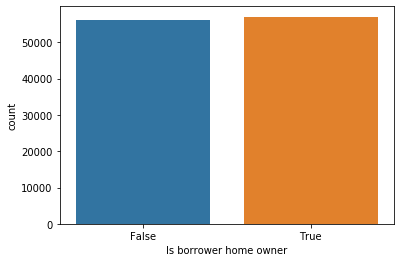

In [88]:
sb.countplot(data = df, x = 'IsBorrowerHomeowner')
plt.xlabel('Is borrower home owner')

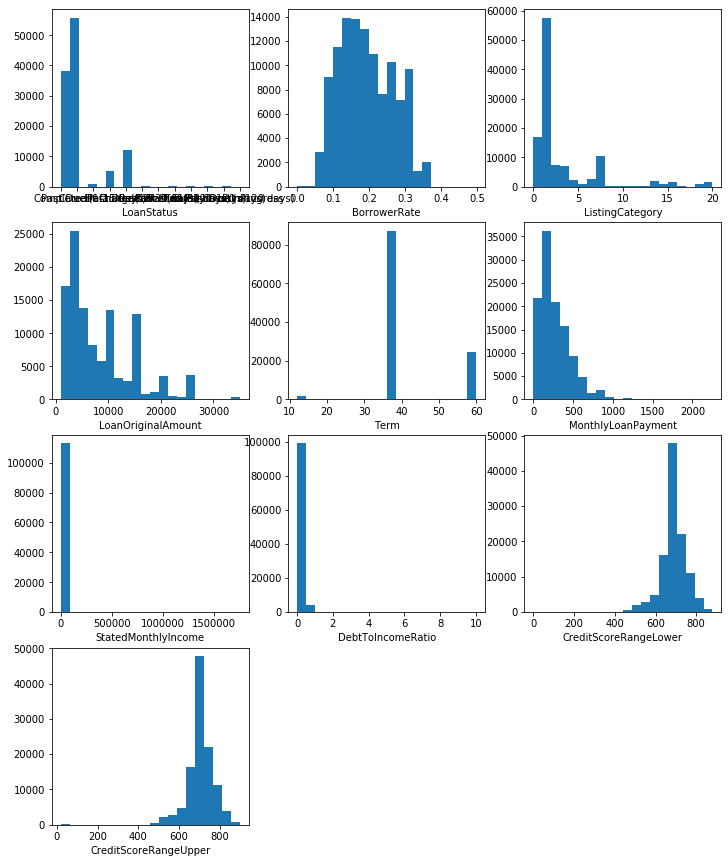

In [85]:
metrics = ['LoanStatus', 'BorrowerRate','ListingCategory','LoanOriginalAmount','Term','MonthlyLoanPayment',
 'StatedMonthlyIncome','DebtToIncomeRatio','CreditScoreRangeLower','CreditScoreRangeUpper' ]
plt.figure(figsize = [12,15] )
i=0
for m in metrics:
    i+=1
    plt.subplot(4,3,i)
    plt.hist(data = df, x=m, bins = 20)
    plt.xlabel(m)
    #plt.xticks(rotation = 15)
   

In [57]:
df.Term.value_counts()

36    87224
60    24228
12     1614
Name: Term, dtype: int64

credit score lower and upper are fairly consistent with each other.

These are all short term loans, with majority at 3 years.

Loan Categories:

|Code | Category |
| --- | ------------------ |
| 0 | Not Available |
| 1 | Debt Consolidation|
| 2 | Home Improvement|
| 3 | Business|
| 4 | Personal Loan|
| 5 | Student Use|
| 6 | Auto|
| 7 | Other|
| 8 | Baby&Adoption|
| 9 | Boat|
| 10 | Cosmetic Procedure|
| 11 | Engagement Ring|
| 12 | Green Loans|
| 13 | Household Expenses|
| 14 | Large Purchases|
| 15 | Medical/Dental|
| 16 | Motorcycle|
| 17 | RV|
| 18 | Taxes|
| 19 | Vacation|
| 20 | Wedding Loans

In [58]:
df.ListingCategory.value_counts()

1     57624
0     16965
7     10448
2      7388
3      7157
6      2568
4      2395
13     1987
15     1507
18      882
14      863
19      764
20      762
5       756
16      304
11      214
8       196
10       91
9        85
12       58
17       52
Name: ListingCategory, dtype: int64

Majority of the loans are for debt consolidation. Other notable loan types are 'home improvement' and 'business'.

'StatedMonthlyIncome','DebtToIncomeRatio', 'LoanStatus' need to be replotted individually

''

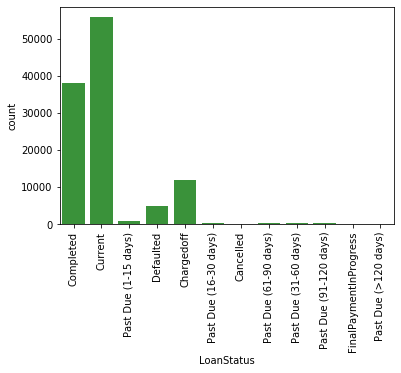

In [25]:
b_color = sb.color_palette()[2]
sb.countplot(data = df, x = 'LoanStatus', color = b_color)
plt.xticks(rotation = 90)
;

In [172]:
df2.LoanStatus.value_counts()

Current                   51558
Completed                 34975
Chargedoff                10568
Defaulted                  4657
Past Due (1-15 days)        714
Past Due (31-60 days)       323
Past Due (91-120 days)      274
Past Due (61-90 days)       268
Past Due (16-30 days)       239
FinalPaymentInProgress      187
Past Due (>120 days)         14
Cancelled                     5
Name: LoanStatus, dtype: int64

Seaborn countplot() does a better job than pyplot hist() in plotting LoanStatus. Majority of the loan is current or completed, followed by 'Chargedoff' and 'Defaulted'.

In [27]:
df.StatedMonthlyIncome.value_counts()

4166.666667    3486
5000.000000    3367
3333.333333    2889
3750.000000    2399
5416.666667    2351
               ... 
6669.833333       1
2207.166667       1
6520.000000       1
4436.333333       1
3928.583333       1
Name: StatedMonthlyIncome, Length: 13502, dtype: int64

In [29]:
df.StatedMonthlyIncome.describe()

count    1.130660e+05
mean     5.605120e+03
std      7.495596e+03
min      0.000000e+00
25%      3.199396e+03
50%      4.666667e+03
75%      6.824688e+03
max      1.750003e+06
Name: StatedMonthlyIncome, dtype: float64

''

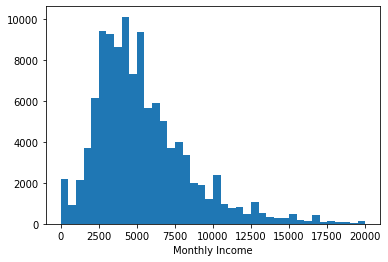

In [62]:
plt.hist( x = df['StatedMonthlyIncome'][df.StatedMonthlyIncome<=20000], bins = 40)
plt.xlabel('Monthly Income')
;

In [76]:
df[df.StatedMonthlyIncome<0.01].shape[0]/df.shape[0]

0.012329082129021987

1.23% of the loans have monthly income less than 1 cent. Strange.

In [74]:
df.shape

(113066, 22)

(100, 100000)

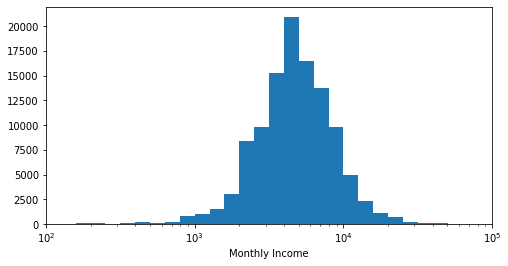

In [63]:
plt.figure(figsize = [8,4])
xt = 10**np.arange(1,7, 0.1)
plt.hist( x = df['StatedMonthlyIncome'], bins= xt )
plt.xscale('log')
plt.xlabel('Monthly Income')

plt.xlim(100, 100000)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


''

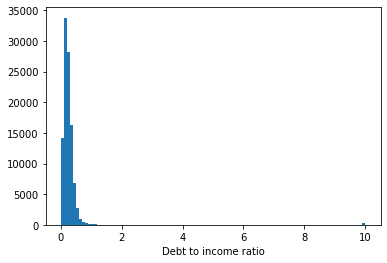

In [64]:
plt.hist(data = df, x = 'DebtToIncomeRatio', bins = 100)
plt.xlabel('Debt to income ratio')

;

In [50]:
df[df.DebtToIncomeRatio>10]

,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,ProsperRating,ListingCategory,...,EmploymentStatus,IsBorrowerHomeowner,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,AvailableBankcardCredit,DebtToIncomeRatio,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment
225,104542,2007-02-28 10:45:44.153,D,36,Completed,2009-07-07 00:00:00,0.11749,0.1000,NaN,0,...,Full-time,True,600.0,619.0,30.0,49014.0,10.01,0.083333,1000,32.27
575,124494,2007-04-16 17:44:06.780,AA,36,Completed,2007-06-28 00:00:00,0.10505,0.0935,NaN,0,...,Retired,False,800.0,819.0,9.0,36908.0,10.01,0.083333,1500,47.94
625,560943,2012-02-20 16:08:45.633,NaN,36,Current,NaN,0.35797,0.3177,1.0,1,...,Employed,False,700.0,719.0,6.0,4955.0,10.01,3.833333,2000,86.85
1240,146341,2007-06-03 20:32:32.783,A,36,Completed,2010-05-25 00:00:00,0.11415,0.1072,NaN,0,...,Not employed,False,740.0,759.0,6.0,22118.0,10.01,0.083333,3000,97.82
1923,139992,2007-05-19 11:14:54.370,A,36,Defaulted,2010-09-29 00:00:00,0.08684,0.0800,NaN,0,...,Not employed,False,740.0,759.0,9.0,5882.0,10.01,0.083333,3000,68.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111459,105214,2007-03-01 15:44:40.763,A,36,Completed,2008-09-24 00:00:00,0.16516,0.1580,NaN,0,...,Self-employed,True,720.0,739.0,4.0,1500.0,10.01,0.083333,6001,210.39
111859,266982,2008-01-17 10:03:22.690,D,36,Chargedoff,2009-09-24 00:00:00,0.25517,0.2400,NaN,3,...,Full-time,False,620.0,639.0,1.0,0.0,10.01,0.083333,2850,111.81
112240,844455,2013-07-19 08:39:08.107,NaN,36,Current,NaN,0.33286,0.2932,2.0,1,...,Employed,False,680.0,699.0,5.0,52.0,10.01,2.083333,2000,84.16
112396,627138,2012-08-21 13:57:58.080,NaN,60,Defaulted,2013-09-17 00:00:00,0.27554,0.2498,4.0,2,...,Employed,True,780.0,799.0,9.0,6124.0,10.01,2.916667,4000,117.36


Some loans with >10 DebtToIncomeRatio are small loans for people who claim to have insubstantial income.

In [59]:
df[df.DebtToIncomeRatio>10].shape[0]/df.shape[0]

0.0024056745617603878

In [60]:
df[df.DebtToIncomeRatio>2].shape[0]/df.shape[0]

0.004236463658394213

In [61]:
df[df.DebtToIncomeRatio>1].shape[0]/df.shape[0]

0.007057824633399961

Debt to income ratio (DTI) is monthly debt payment divided by monthly income. According to [Investopedia](https://www.investopedia.com/ask/answers/081214/whats-considered-be-good-debttoincome-dti-ratio.asp 'Investopedia article on "Good CTI ratio"'), lenders prefer to see a debt-to-income ratio smaller than 36%.


''

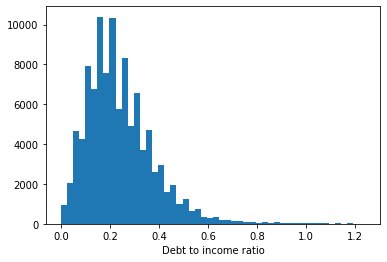

In [65]:
plt.hist(x = df['DebtToIncomeRatio'][df.DebtToIncomeRatio < 1.25], bins = 50)
plt.xlabel('Debt to income ratio')
;

Most loan are lent to customer with debt-to-income-ratio < 0.8, and most commonly at ~0.2

''

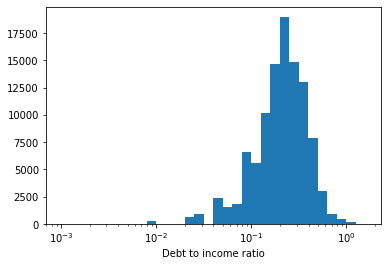

In [66]:
bin_e = 10**np.arange(-3, 0.21, 0.1)
plt.hist(x = df['DebtToIncomeRatio'][df.DebtToIncomeRatio < 1.25], bins = bin_e)
plt.xscale('log')
plt.xlabel('Debt to income ratio')

;

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

In [116]:
metrics2 = metrics[:-1].copy()

In [123]:
metrics2.append('IsBorrowerHomeowner')
metrics2

['LoanStatus',
 'BorrowerRate',
 'ListingCategory',
 'LoanOriginalAmount',
 'Term',
 'MonthlyLoanPayment',
 'StatedMonthlyIncome',
 'DebtToIncomeRatio',
 'CreditScoreRangeLower',
 'IsBorrowerHomeowner']

In [142]:
df2.describe()

,BorrowerRate,ListingCategory,LoanOriginalAmount,Term,MonthlyLoanPayment,StatedMonthlyIncome,DebtToIncomeRatio,CreditScoreRangeLower
count,103782.000000,103782.000000,103782.000000,103782.000000,103782.000000,103782.000000,103782.000000,103199.000000
mean,0.190461,2.728267,8436.498930,40.946291,274.104442,5686.473994,0.239399,684.827954
std,0.074110,4.001421,6327.125112,10.482672,194.206773,4945.156024,0.135369,65.388869
min,0.000000,0.000000,1000.000000,12.000000,0.000000,0.000000,0.000000,0.000000
25%,0.131400,1.000000,4000.000000,36.000000,131.215000,3333.333333,0.140000,660.000000
50%,0.180000,1.000000,6500.000000,36.000000,220.000000,4766.666667,0.220000,680.000000
75%,0.249200,3.000000,12000.000000,36.000000,372.710000,6916.666667,0.310000,720.000000
max,0.497500,20.000000,35000.000000,60.000000,2251.510000,483333.333333,0.990000,880.000000


In [262]:
df2 = df[df.DebtToIncomeRatio <1][metrics2]

In [171]:
df2.LoanStatus.value_counts()

Current                   51558
Completed                 34975
Chargedoff                10568
Defaulted                  4657
Past Due (1-15 days)        714
Past Due (31-60 days)       323
Past Due (91-120 days)      274
Past Due (61-90 days)       268
Past Due (16-30 days)       239
FinalPaymentInProgress      187
Past Due (>120 days)         14
Cancelled                     5
Name: LoanStatus, dtype: int64

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> 1.2% of loans claim to have monthly income < 1 cent. 0.7% of loans have DTI ratio > 1. 

## Bivariate Exploration

Borrower rate ~ loan category, term, credit score(lower), is borrower homeowner
Loan status


> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [362]:
df2_corr =df2.corr()
df2_corr

,ListingNumber,Term,BorrowerAPR,BorrowerRate,ProsperRating,ListingCategory,IsBorrowerHomeowner,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,AvailableBankcardCredit,DebtToIncomeRatio,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment
ListingNumber,1.000000,0.320191,-0.029314,-0.112241,0.209065,0.128971,0.077888,0.270609,0.270609,0.144986,0.036837,-0.041875,0.076209,0.339750,0.276685
Term,0.320191,1.000000,-0.010810,0.020376,0.080679,0.005479,0.085354,0.126542,0.126542,0.076848,0.015552,-0.014776,0.028531,0.339283,0.091480
BorrowerAPR,-0.029314,-0.010810,1.000000,0.989817,-0.962202,0.132600,-0.132609,-0.429289,-0.429289,-0.093115,-0.349179,0.056200,-0.082058,-0.322323,-0.225951
BorrowerRate,-0.112241,0.020376,0.989817,1.000000,-0.953102,0.102852,-0.134316,-0.461342,-0.461342,-0.097062,-0.344172,0.062807,-0.088722,-0.328339,-0.243964
ProsperRating,0.209065,0.080679,-0.962202,-0.953102,1.000000,-0.094242,0.136271,0.549401,0.549401,0.092155,0.375025,-0.135336,0.094116,0.429202,0.329405
ListingCategory,0.128971,0.005479,0.132600,0.102852,-0.094242,1.000000,-0.037918,0.102843,0.102843,-0.104877,-0.031467,-0.042726,0.001372,-0.127143,-0.118236
IsBorrowerHomeowner,0.077888,0.085354,-0.132609,-0.134316,0.136271,-0.037918,1.000000,0.294119,0.294119,0.278930,0.142155,0.000134,0.140131,0.206859,0.179851
CreditScoreRangeLower,0.270609,0.126542,-0.429289,-0.461342,0.549401,0.102843,0.294119,1.000000,1.000000,0.141847,0.453301,-0.013312,0.107969,0.341488,0.293082
CreditScoreRangeUpper,0.270609,0.126542,-0.429289,-0.461342,0.549401,0.102843,0.294119,1.000000,1.000000,0.141847,0.453301,-0.013312,0.107969,0.341488,0.293082
CurrentCreditLines,0.144986,0.076848,-0.093115,-0.097062,0.092155,-0.104877,0.278930,0.141847,0.141847,1.000000,0.317422,0.091685,0.143161,0.200852,0.186466


AttributeError: 'function' object has no attribute 'info'

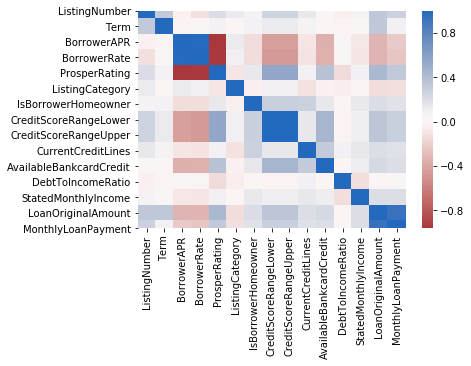

In [367]:
sb.heatmap(data = df2_corr, cmap = 'vlag_r')
; #term~loanAmount, credit score lower ~ upper, 

In [163]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103782 entries, 0 to 113065
Data columns (total 10 columns):
LoanStatus               103782 non-null object
BorrowerRate             103782 non-null float64
ListingCategory          103782 non-null int64
LoanOriginalAmount       103782 non-null int64
Term                     103782 non-null int64
MonthlyLoanPayment       103782 non-null float64
StatedMonthlyIncome      103782 non-null float64
DebtToIncomeRatio        103782 non-null float64
CreditScoreRangeLower    103199 non-null float64
IsBorrowerHomeowner      103782 non-null bool
dtypes: bool(1), float64(5), int64(3), object(1)
memory usage: 13.0+ MB


### Borrower rate vs. other variables:

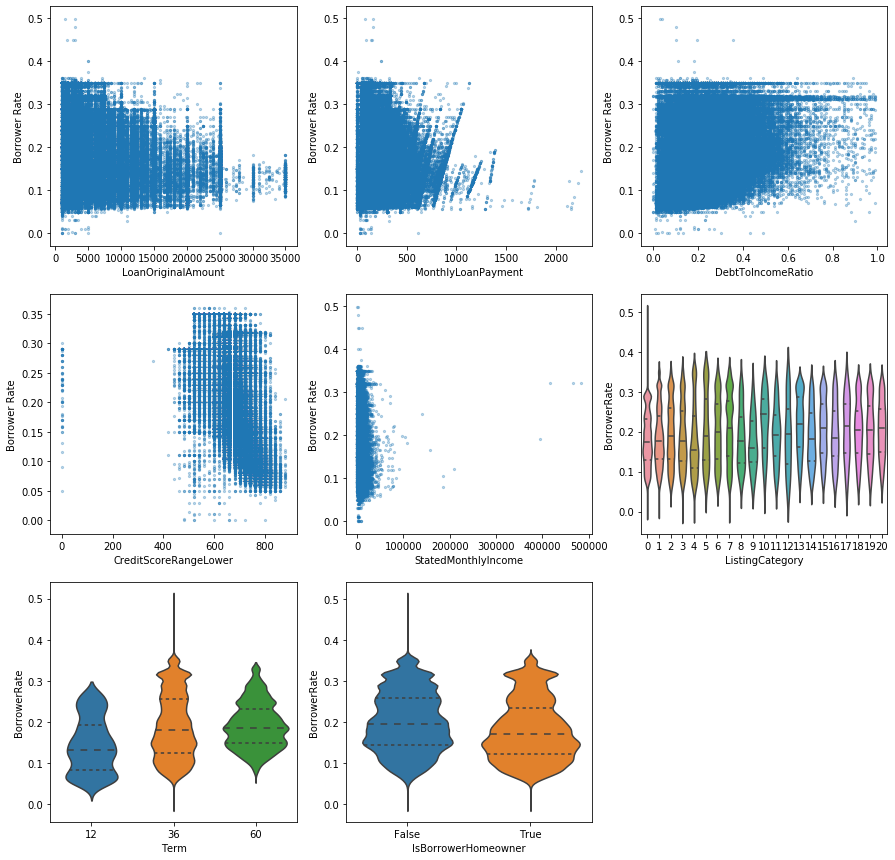

In [165]:

plt.figure(figsize = [15, 15])
i=0
#numeric features:
for m in ['LoanOriginalAmount','MonthlyLoanPayment',
          'DebtToIncomeRatio','CreditScoreRangeLower','StatedMonthlyIncome' ]:
    i+=1
    plt.subplot(3,3,i)
    plt.scatter(data = df2, y = 'BorrowerRate', x =m, s = 5, alpha =0.3 )
    plt.xlabel(m)
    plt.ylabel('Borrower Rate')
    

#Categorical features
for m in ['ListingCategory', 'Term', 'IsBorrowerHomeowner']:
    i+=1
    plt.subplot(3,3,i)
    sb.violinplot(data = df2, y = 'BorrowerRate', x =m , inner = 'quartile')
    
    

There are correlations between borrower rate and term or homeownershop. Lower term duration is associated with lower rate, home owners have lower rate, as well.
With scatter plot, it's harder to see borrowing rate's correlation to 'LoanOriginalAmount','MonthlyLoanPayment', 'DebtToIncomeRatio','CreditScoreRangeLower', due to large amounts of data points. change them to hist2d.

''

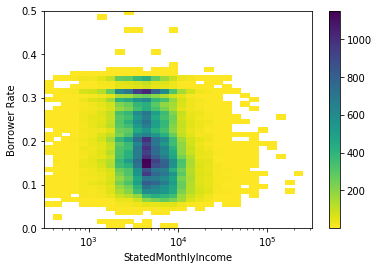

In [160]:
#plot rate ~ income with log scale on income
xt = 10**np.arange(2.5, 5.51, 0.1) #monthly income 300 ~ 300,000
yt = np.arange(0, 0.51, 0.01)
plt.hist2d(data = df2, y = 'BorrowerRate', x ='StatedMonthlyIncome', bins = [xt, yt], cmap = 'viridis_r', cmin = 0.5)
plt.xscale('log')
plt.xlabel('StatedMonthlyIncome')
plt.colorbar()
plt.ylabel('Borrower Rate')
;


Put all the plots together:

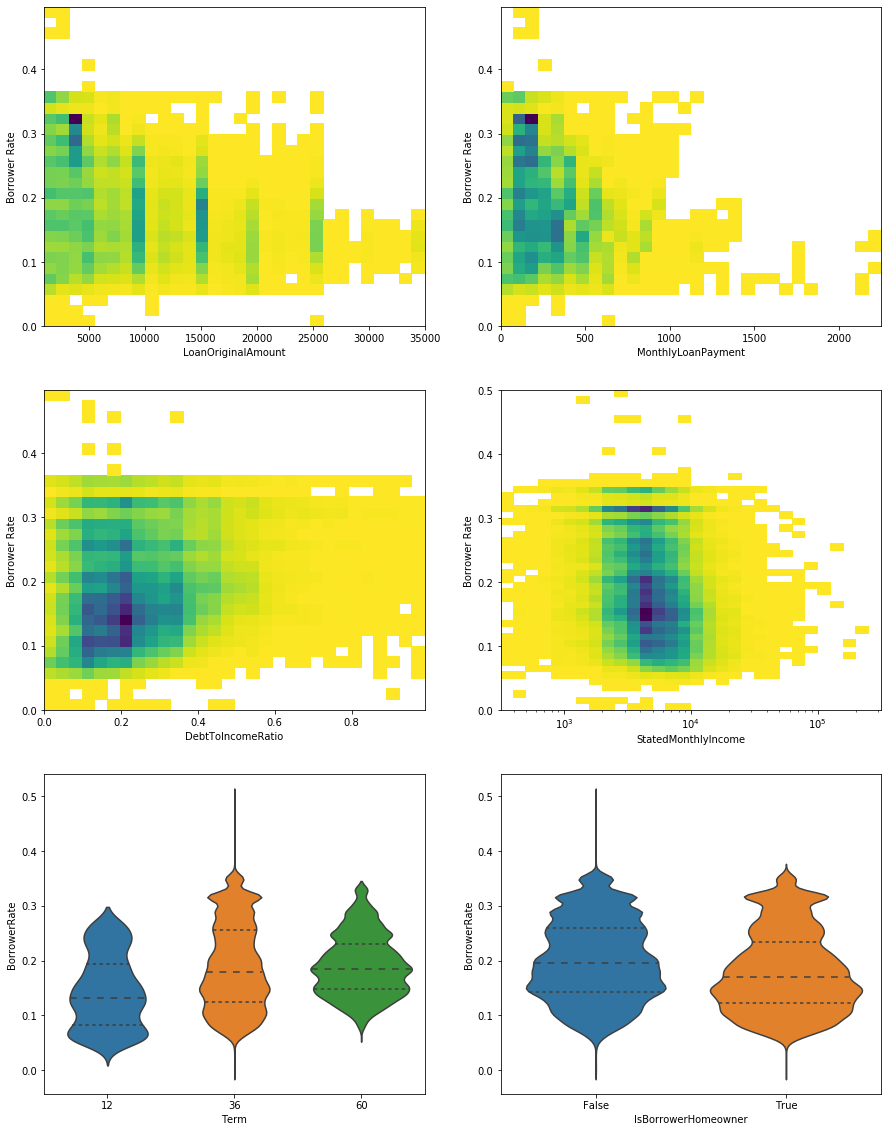

In [169]:
plt.figure(figsize = [15, 20])
i=0
#numeric features:
for m in ['LoanOriginalAmount','MonthlyLoanPayment',
          'DebtToIncomeRatio']:
    i+=1
    plt.subplot(3,2,i)
    plt.hist2d(data = df2, y = 'BorrowerRate', x =m, cmap = 'viridis_r', cmin = 0.5 , bins = 30)
    plt.xlabel(m)
    plt.ylabel('Borrower Rate')

i+=1
plt.subplot(3,2,i)
xt = 10**np.arange(2.5, 5.51, 0.1) #monthly income 300 ~ 300,000
yt = np.arange(0, 0.51, 0.01)
plt.hist2d(data = df2, y = 'BorrowerRate', x ='StatedMonthlyIncome', bins = [xt, yt], cmap = 'viridis_r', cmin = 0.5)
plt.xscale('log')
plt.xlabel('StatedMonthlyIncome')
plt.ylabel('Borrower Rate')
;

#Categorical features
for m in ['Term', 'IsBorrowerHomeowner']:
    i+=1
    plt.subplot(3,2,i)
    sb.violinplot(data = df2, y = 'BorrowerRate', x =m , inner = 'quartile')


In [178]:
df2_cs = df2[df2.CreditScoreRangeLower.isna()==False]

Text(0, 0.5, 'Borrower Rate')

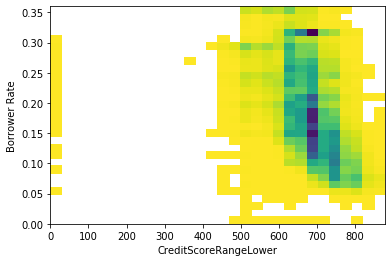

In [181]:
plt.hist2d(data = df2_cs, y = 'BorrowerRate', x ='CreditScoreRangeLower', bins = 30, cmap = 'viridis_r', cmin = 0.5)
plt.xlabel('CreditScoreRangeLower')
plt.ylabel('Borrower Rate')
;

It is now clearly visible that borrowing rate is inversely correlated with loan amount and credit score, but positively correlated with debt DTI ratio.

In [170]:
type(df2.LoanStatus[1])

str

In [182]:
df2.LoanStatus.value_counts()

Current                   51558
Completed                 34975
Chargedoff                10568
Defaulted                  4657
Past Due (1-15 days)        714
Past Due (31-60 days)       323
Past Due (91-120 days)      274
Past Due (61-90 days)       268
Past Due (16-30 days)       239
FinalPaymentInProgress      187
Past Due (>120 days)         14
Cancelled                     5
Name: LoanStatus, dtype: int64

### Loan status vs. other variables

In [263]:
df2 = pd.read_csv('selectLoanData.csv')

In [264]:
df2.shape

(113066, 22)

In [268]:
metrics3 = ['LoanStatus', 'BorrowerRate','ListingCategory','LoanOriginalAmount','Term','MonthlyLoanPayment',
 'StatedMonthlyIncome','DebtToIncomeRatio','CreditScoreRangeLower','IsBorrowerHomeowner']

In [269]:
df3 = df2[ metrics3]

In [292]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113066 entries, 0 to 113065
Data columns (total 11 columns):
LoanStatus               113066 non-null object
BorrowerRate             113066 non-null float64
ListingCategory          113066 non-null int64
LoanOriginalAmount       113066 non-null int64
Term                     113066 non-null int64
MonthlyLoanPayment       113066 non-null float64
StatedMonthlyIncome      113066 non-null float64
DebtToIncomeRatio        104594 non-null float64
CreditScoreRangeLower    112475 non-null float64
IsBorrowerHomeowner      113066 non-null bool
LoanS                    113061 non-null category
dtypes: bool(1), category(1), float64(5), int64(3), object(1)
memory usage: 8.0+ MB


In [289]:
df3.to_csv('LoanDatav3.csv')

In [ ]:
df3['LoanS'] = df3.LoanStatus

In [287]:
df3.LoanS = df3.LoanS.map({'Current':'Current', 'Completed':'Completed', 'FinalPaymentInProgress':'Completed','Chargedoff':'Failed', 'Defaulted':'Failed',
                                'Past Due (1-15 days)':'PastDue', 'Past Due (31-60 days)':'PastDue','Past Due (91-120 days)':'PastDue',
                                'Past Due (61-90 days)':'PastDue','Past Due (16-30 days)':'PastDue','Past Due (>120 days)':'PastDue'}) 

TypeError: map() must have at least two arguments.

In [278]:
df3.LoanS.value_counts()

Current      55730
Completed    38264
Failed       17010
PastDue       2057
Name: LoanS, dtype: int64

In [296]:
ls = ['Completed','Current','PastDue','Failed']
t = pd.api.types.CategoricalDtype(categories = ls, ordered = True)
df3.LoanS = df3.LoanS.astype(t)
df3.LoanS.value_counts()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Current      55730
Completed    38264
Failed       17010
PastDue       2057
Name: LoanS, dtype: int64

In [298]:
type(df3.LoanStatus[0]) # LoanS is category, but not recognized by value_counts() or type()

str

''

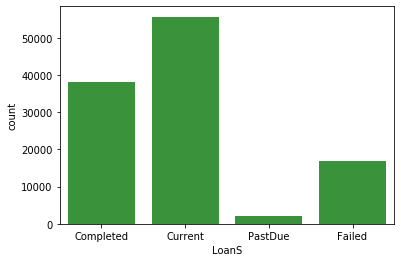

In [299]:
df3_ls = df3[df3.LoanS.isna()  == False] #define df3_ls to be excluding the cancelled loans
sb.countplot(df3_ls.LoanS, color = b_color)
;

''

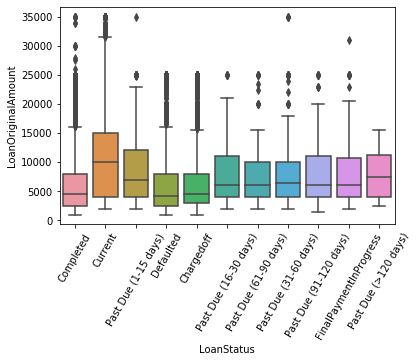

In [304]:
sb.boxplot(data = df3_ls, x = 'LoanStatus', y = 'LoanOriginalAmount' )
plt.xticks(rotation = 60)
;

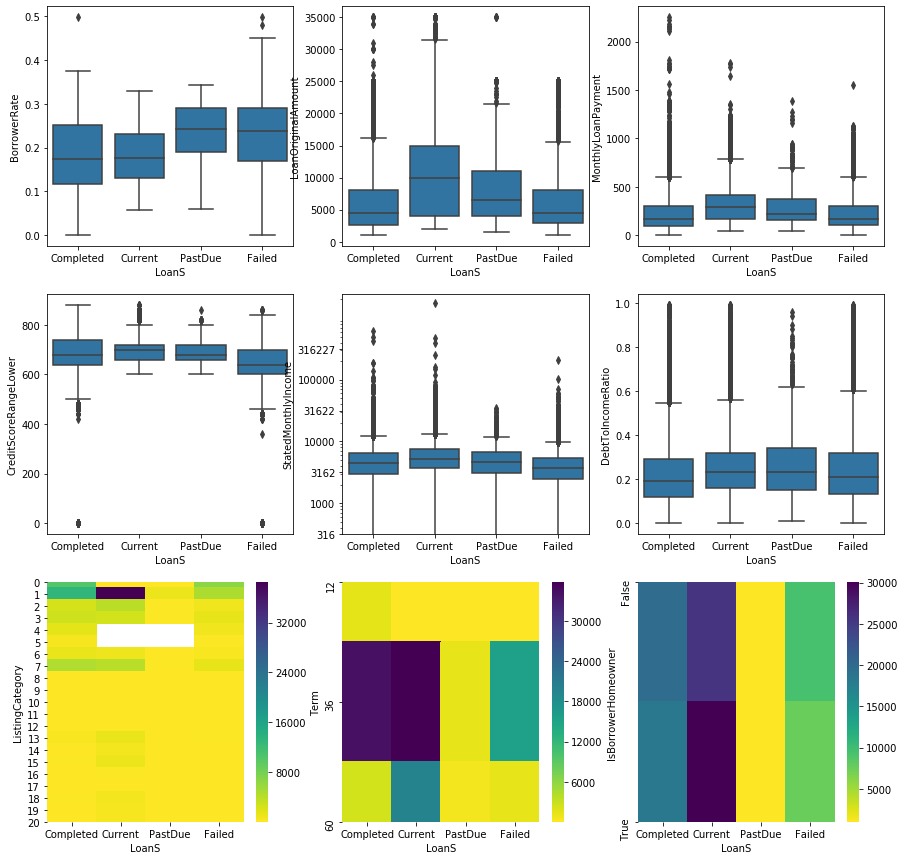

In [361]:
a_color = sb.color_palette()[0]
plt.figure(figsize = [15,15])
i=0
for m in ['BorrowerRate','LoanOriginalAmount','MonthlyLoanPayment',
 'CreditScoreRangeLower']:
    i+=1
    plt.subplot(3,3,i)
    sb.boxplot(data = df3_ls, x= 'LoanS', y = m, color = a_color)
 
i+=1
plt.subplot(3,3,i)
yt = 10**np.arange(2.5, 5.51, 0.5) #monthly income 300 ~ 300,000
sb.boxplot(data = df3_ls, x= 'LoanS', y = 'StatedMonthlyIncome', color = a_color)
plt.yscale('log')
plt.yticks(yt, yt.astype(int))

i+=1
plt.subplot(3,3,i) #filter out DTI>=1
sb.boxplot(data = df3_ls[df3_ls.DebtToIncomeRatio<1], x= 'LoanS', y = 'DebtToIncomeRatio', color = a_color)

for m in ['ListingCategory','Term','IsBorrowerHomeowner']:
    i+=1
    plt.subplot(3,3,i)
    cnt = df3_ls[['LoanS',m,'LoanOriginalAmount']].groupby(['LoanS',m]).count().reset_index()
    cnt = cnt.pivot(index = m, columns='LoanS', values = 'LoanOriginalAmount')
    sb.heatmap(data = cnt, cmap = 'viridis_r')


    

Debt consolidation is the main category.
Last 2 graphs are not very illustrative

In [358]:
yt.round(0)

array([3.16000e+02, 3.98000e+02, 5.01000e+02, 6.31000e+02, 7.94000e+02,
       1.00000e+03, 1.25900e+03, 1.58500e+03, 1.99500e+03, 2.51200e+03,
       3.16200e+03, 3.98100e+03, 5.01200e+03, 6.31000e+03, 7.94300e+03,
       1.00000e+04, 1.25890e+04, 1.58490e+04, 1.99530e+04, 2.51190e+04,
       3.16230e+04, 3.98110e+04, 5.01190e+04, 6.30960e+04, 7.94330e+04,
       1.00000e+05, 1.25893e+05, 1.58489e+05, 1.99526e+05, 2.51189e+05,
       3.16228e+05])

''

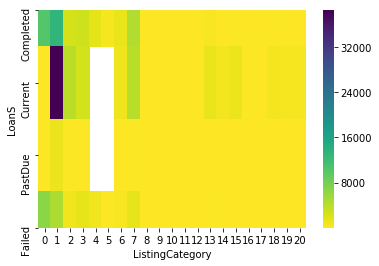

In [351]:
cnt = df3_ls[['LoanS','ListingCategory','LoanOriginalAmount']].groupby(['LoanS','ListingCategory']).count().reset_index()
cnt = cnt.pivot(index = 'LoanS', columns='ListingCategory', values = 'LoanOriginalAmount')
sb.heatmap(data = cnt, cmap = 'viridis_r')
;

In [341]:
cnt.Term.fillna(0,inplace = True)

In [336]:
cnt.ListingCategory.value_counts()

20    4
9     4
1     4
2     4
3     4
4     4
5     4
6     4
7     4
8     4
10    4
19    4
11    4
12    4
13    4
14    4
15    4
16    4
17    4
18    4
0     4
Name: ListingCategory, dtype: int64

In [343]:
cnt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 3 columns):
LoanS              84 non-null category
ListingCategory    84 non-null int64
Term               84 non-null float64
dtypes: category(1), float64(1), int64(1)
memory usage: 1.7 KB


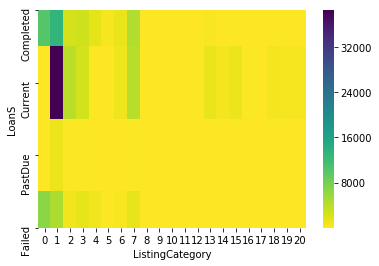

In [349]:
sb.heatmap(data = cnt, cmap = 'viridis_r') ;

In [345]:
cnt.head()

ListingCategory,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
LoanS,,,,,,,,,,,,,,,,,,,,,
Completed,10253.0,13273.0,2448.0,2861.0,1620.0,561.0,1219.0,4571.0,27.0,25.0,...,58.0,11.0,377.0,141.0,240.0,87.0,16.0,163.0,151.0,128.0
Current,12.0,38526.0,3920.0,2708.0,0.0,0.0,971.0,4174.0,150.0,55.0,...,143.0,35.0,1312.0,640.0,1063.0,201.0,34.0,636.0,539.0,567.0
PastDue,1.0,1124.0,210.0,179.0,0.0,0.0,49.0,212.0,6.0,2.0,...,7.0,3.0,72.0,36.0,73.0,8.0,1.0,29.0,21.0,21.0
Failed,6695.0,4700.0,810.0,1409.0,775.0,195.0,329.0,1491.0,13.0,3.0,...,6.0,9.0,226.0,46.0,131.0,8.0,1.0,54.0,53.0,46.0


In [316]:
cnt.Term.sum()

113061.0

In [323]:
cnt = cnt.reset_index()

In [344]:
cnt = cnt.pivot(index = 'LoanS', columns='ListingCategory', values = 'Term')

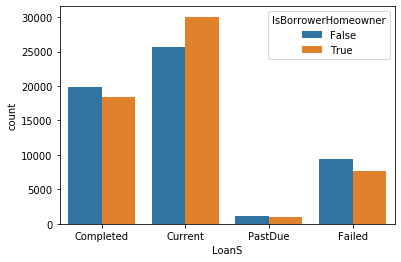

In [377]:
#'Term','IsBorrowerHomeowner'~ 'LoanS' - Term is not that interesting
sb.countplot(data = df3_ls, x = 'LoanS', hue = 'IsBorrowerHomeowner');

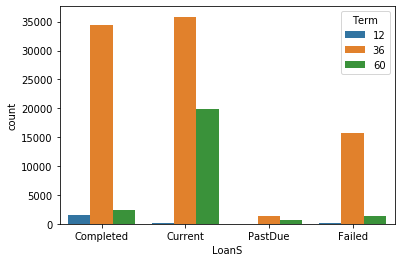

In [386]:
sb.countplot(data = df3_ls, x = 'LoanS', hue = 'Term');

60 month loans are least likely to be 'completed', while 12 month loans very likely to be 'completed'. 36 month loans have significant proportion of being 'failed'.

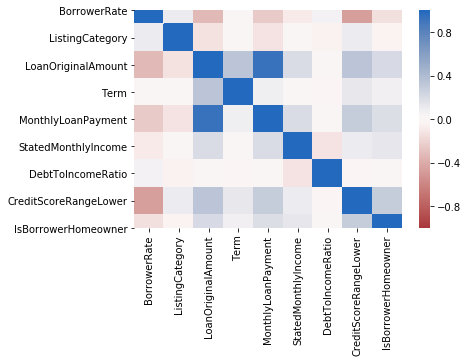

In [375]:
corr = df3.corr()
sb.heatmap(corr, cmap = 'vlag_r',vmin = -1, vmax = 1, center =0 );

loan amount ~ monthly payment, (monthly income ~ DTI), loan amount ~ term, loan amount ~ credit score, credit score ~ home owner ..

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

Home owners are more likely to have a on-going loan, but less likely to have defaulted or 'charged' a loan. or completed a loan.

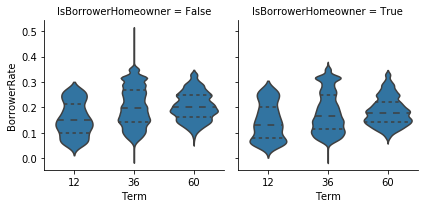

In [385]:
#'BorrowerRate', 'LoanS', 'CreditScoreRangeLower'
#'BorrowerRate','IsBorrowerHomeowner', 'Term'

g = sb.FacetGrid(data = df3, col = 'IsBorrowerHomeowner')
g.map(sb.violinplot, 'Term', 'BorrowerRate', inner = 'quartile');

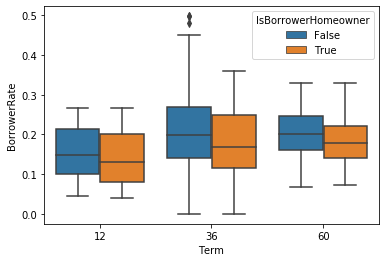

In [397]:
sb.boxplot(data = df3_ls, x = 'Term', y = 'BorrowerRate', hue = 'IsBorrowerHomeowner', dodge = True);


Home owners have lower interest rate, when term is extracted as a seperate dimension.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!